In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_attack_youngsters_india.csv')
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [3]:
df.shape

(10000, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


## Feature Engineering + EDA (Univariate Analysis)

In [7]:
df.dtypes

Age                                           int64
Gender                                       object
Region                                       object
Urban/Rural                                  object
SES                                          object
Smoking Status                               object
Alcohol Consumption                          object
Diet Type                                    object
Physical Activity Level                      object
Screen Time (hrs/day)                         int64
Sleep Duration (hrs/day)                      int64
Family History of Heart Disease              object
Diabetes                                     object
Hypertension                                 object
Cholesterol Levels (mg/dL)                    int64
BMI (kg/m²)                                 float64
Stress Level                                 object
Blood Pressure (systolic/diastolic mmHg)     object
Resting Heart Rate (bpm)                      int64
ECG Results 

In [8]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Stress Level,Blood Pressure (systolic/diastolic mmHg),Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,High,177.0/63.1,82,Normal,Non-anginal,183,No,94.1,58,No
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,High,137.5/110.7,76,Normal,Non-anginal,118,No,97.1,341,No
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,Low,138.3/76.6,86,Normal,Typical,164,No,92.7,373,Yes
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,Medium,177.1/90.0,106,Normal,Non-anginal,188,No,98.4,102,Yes
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,Low,130.7/108.8,73,Normal,Atypical,216,No,94.9,235,No


In [9]:
df[['systolic BP', 'diastolic BP']] = df['Blood Pressure (systolic/diastolic mmHg)'].str.split("/", expand = True)
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,systolic BP,diastolic BP
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,82,Normal,Non-anginal,183,No,94.1,58,No,177.0,63.1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,76,Normal,Non-anginal,118,No,97.1,341,No,137.5,110.7
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,86,Normal,Typical,164,No,92.7,373,Yes,138.3,76.6
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,106,Normal,Non-anginal,188,No,98.4,102,Yes,177.1,90.0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,73,Normal,Atypical,216,No,94.9,235,No,130.7,108.8


In [10]:
df['systolic BP'] = pd.to_numeric(df['systolic BP'])
df['diastolic BP'] = pd.to_numeric(df['diastolic BP'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       10000 non-null  int64  
 1   Gender                                    10000 non-null  object 
 2   Region                                    10000 non-null  object 
 3   Urban/Rural                               10000 non-null  object 
 4   SES                                       10000 non-null  object 
 5   Smoking Status                            10000 non-null  object 
 6   Alcohol Consumption                       10000 non-null  object 
 7   Diet Type                                 10000 non-null  object 
 8   Physical Activity Level                   10000 non-null  object 
 9   Screen Time (hrs/day)                     10000 non-null  int64  
 10  Sleep Duration (hrs/day)           

In [12]:
df = df.drop('Blood Pressure (systolic/diastolic mmHg)', axis = 1)

In [13]:
df.head()

,Age,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Screen Time (hrs/day),...,Resting Heart Rate (bpm),ECG Results,Chest Pain Type,Maximum Heart Rate Achieved,Exercise Induced Angina,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),Heart Attack Likelihood,systolic BP,diastolic BP
0,30,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,3,...,82,Normal,Non-anginal,183,No,94.1,58,No,177.0,63.1
1,24,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,15,...,76,Normal,Non-anginal,118,No,97.1,341,No,137.5,110.7
2,24,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,15,...,86,Normal,Typical,164,No,92.7,373,Yes,138.3,76.6
3,27,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,6,...,106,Normal,Non-anginal,188,No,98.4,102,Yes,177.1,90.0
4,21,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,4,...,73,Normal,Atypical,216,No,94.9,235,No,130.7,108.8


In [14]:
num_cols = df.select_dtypes(exclude = 'object')
num_cols.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
0,30,3,8,148,34.4,82,183,94.1,58,177.0,63.1
1,24,15,9,124,25.0,76,118,97.1,341,137.5,110.7
2,24,15,3,256,33.9,86,164,92.7,373,138.3,76.6
3,27,6,7,137,19.0,106,188,98.4,102,177.1,90.0
4,21,4,9,262,28.0,73,216,94.9,235,130.7,108.8


In [15]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Hypertension,Stress Level,ECG Results,Chest Pain Type,Exercise Induced Angina,Heart Attack Likelihood
0,Male,East,Urban,Middle,Never,Regularly,Non-Vegetarian,Sedentary,No,No,Yes,High,Normal,Non-anginal,No,No
1,Female,East,Urban,Low,Occasionally,Occasionally,Non-Vegetarian,Sedentary,No,No,No,High,Normal,Non-anginal,No,No
2,Female,North,Urban,Low,Occasionally,Occasionally,Vegan,High,Yes,Yes,No,Low,Normal,Typical,No,Yes
3,Male,East,Urban,Middle,Occasionally,Never,Vegetarian,Sedentary,No,No,No,Medium,Normal,Non-anginal,No,Yes
4,Female,West,Rural,Low,Occasionally,Occasionally,Vegetarian,Moderate,Yes,No,No,Low,Normal,Atypical,No,No


In [16]:
for col in cat_cols:
    print(f"Columns: {col}")
    print(df[col].value_counts(dropna = False))
    print("-"*50)
    

Columns: Gender
Gender
Male      4913
Female    4856
Other      231
Name: count, dtype: int64
--------------------------------------------------
Columns: Region
Region
Central       1746
North         1700
South         1664
East          1658
West          1643
North-East    1589
Name: count, dtype: int64
--------------------------------------------------
Columns: Urban/Rural
Urban/Rural
Urban    5918
Rural    4082
Name: count, dtype: int64
--------------------------------------------------
Columns: SES
SES
Low       4019
Middle    3942
High      2039
Name: count, dtype: int64
--------------------------------------------------
Columns: Smoking Status
Smoking Status
Never           5013
Occasionally    2967
Regularly       2020
Name: count, dtype: int64
--------------------------------------------------
Columns: Alcohol Consumption
Alcohol Consumption
Never           6006
Occasionally    2999
Regularly        995
Name: count, dtype: int64
-----------------------------------------------

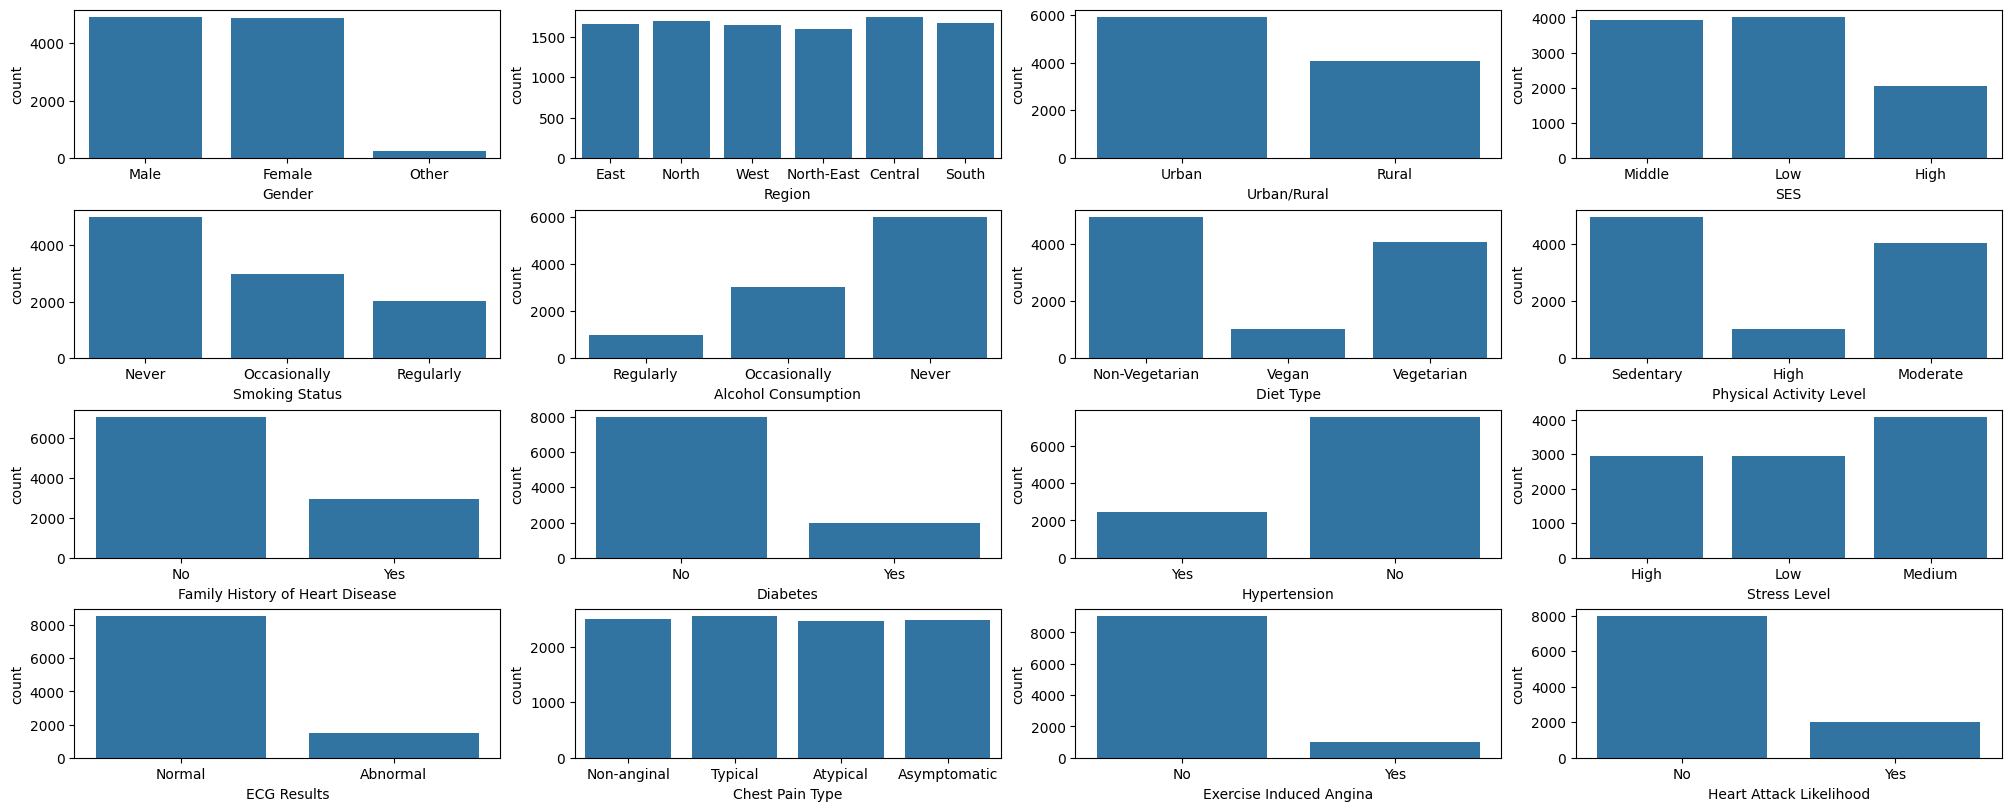

In [17]:
import seaborn as sns

fig, axs = plt.subplots(4, 4, figsize = (20, 8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data = df, x = col, ax = axs[i])
plt.show()

In [18]:
num_cols.shape

(10000, 11)

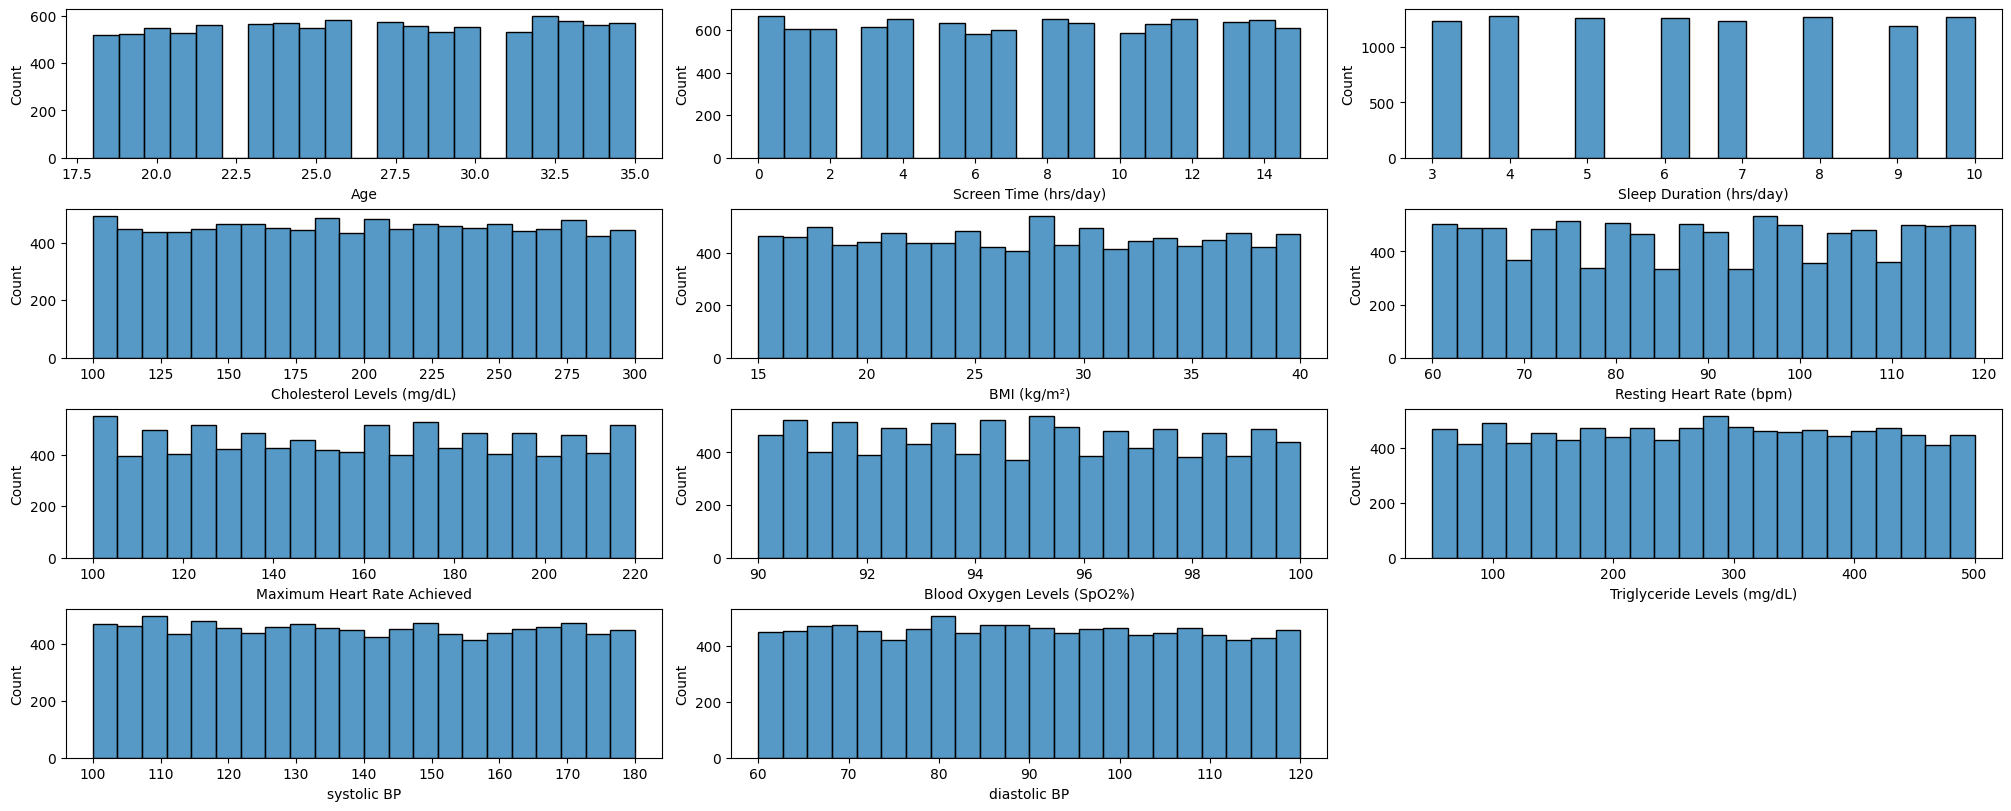

In [19]:
# Univariate - Numerical Columns

fig, axs = plt.subplots(4, 3, figsize = (20,8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data = df, x = col, ax = axs[i])

axs[-1].set_visible(False)
plt.show()

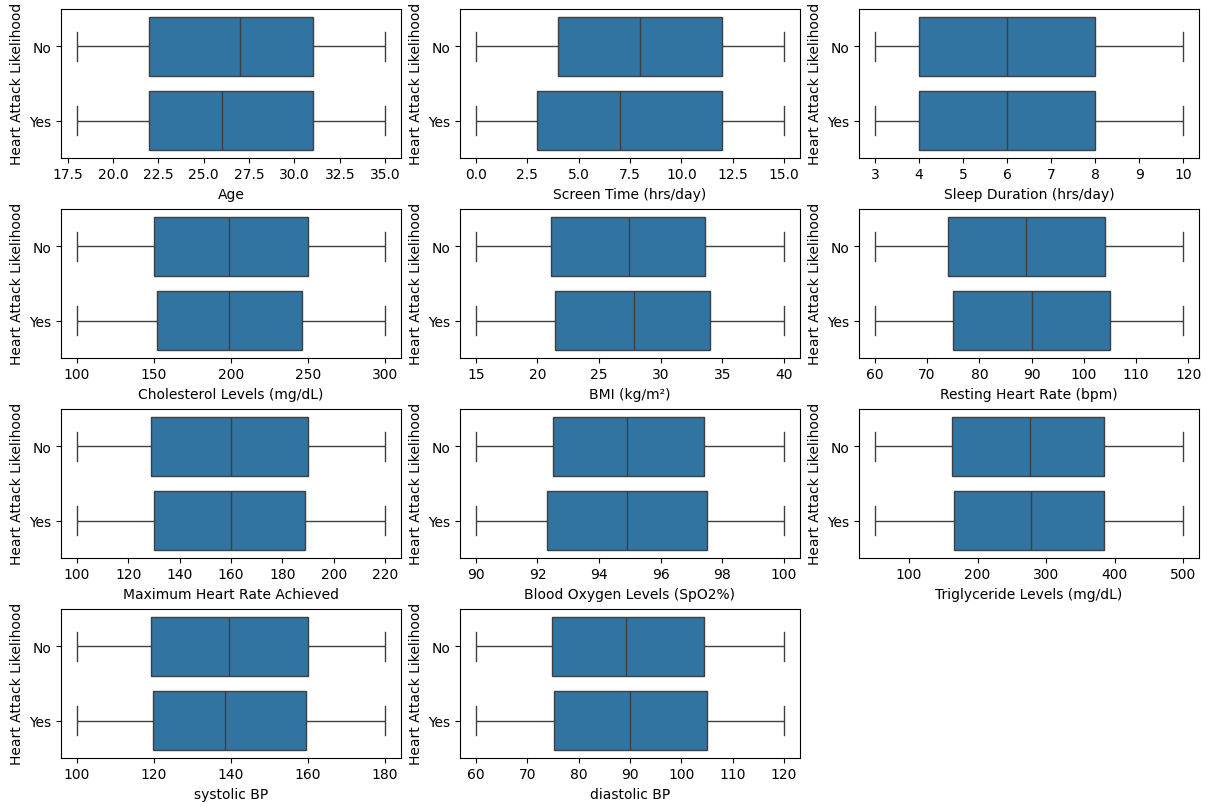

In [20]:
# Bivariate Analysis - Numerical vs Categorical (Target)

fig, axs = plt.subplots(4, 3, figsize = (12,8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data = df, x = col, y = 'Heart Attack Likelihood', ax = axs[i])
axs[-1].set_visible(False)
plt.show()

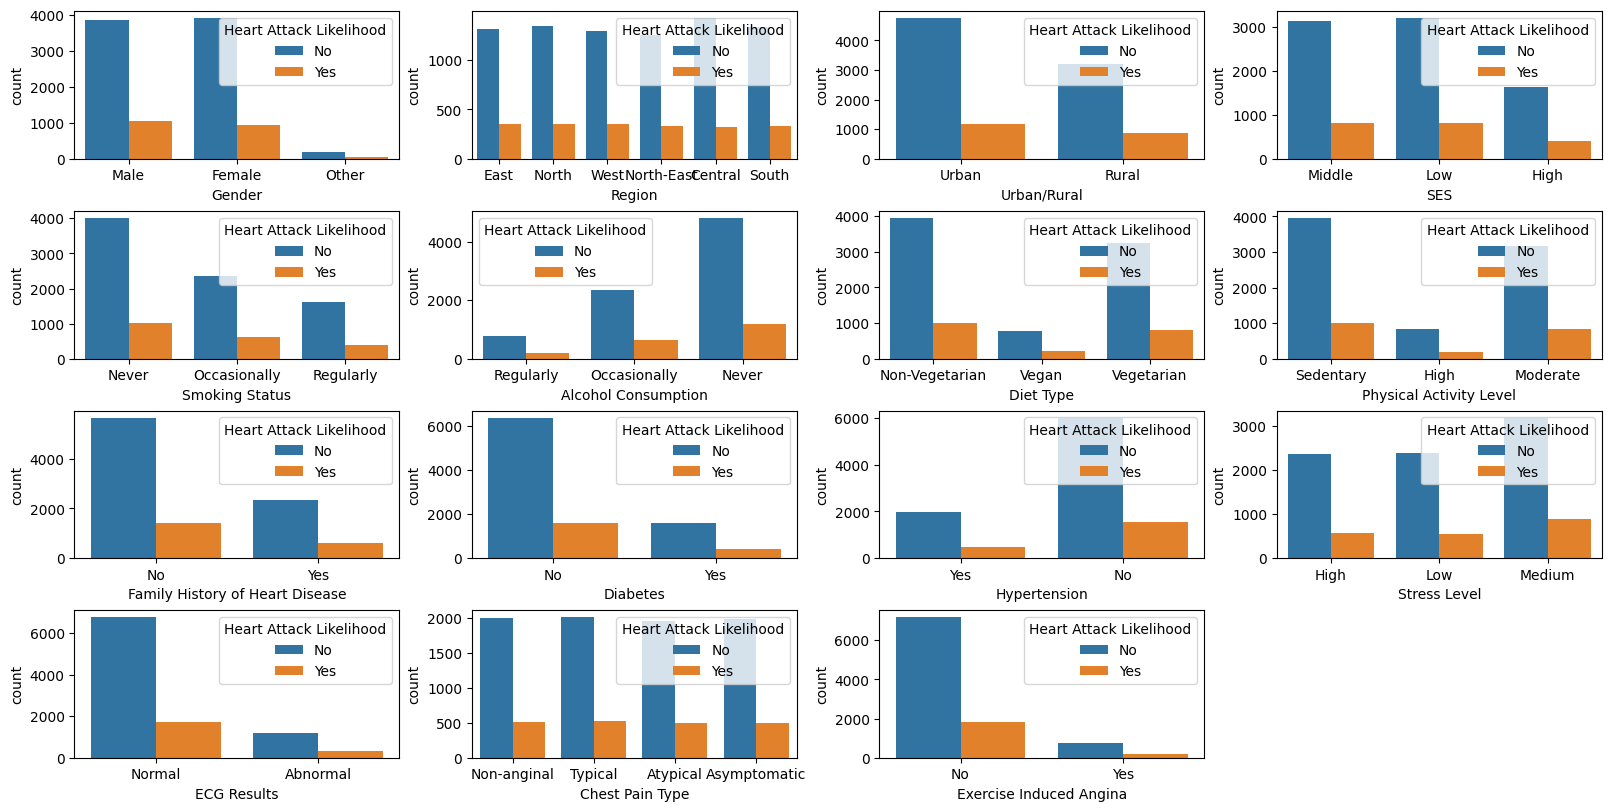

In [21]:
# Bivariate - Categorical vs Categorical (Target)

fig, axs = plt.subplots(4, 4, figsize = (16,8), constrained_layout = True)
axs = axs.ravel()

for i, col in enumerate(cat_cols):
    sns.countplot(data = df, x = col, hue = 'Heart Attack Likelihood', ax = axs[i])
axs[-1].set_visible(False)
plt.show()

In [22]:
import sklearn

print(sklearn.__version__)

1.5.1


In [23]:
# Define the predictors(X) and target variables (y)

X = df.drop(columns = ['Heart Attack Likelihood'])
y = df['Heart Attack Likelihood']

In [24]:
# Split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30, 
                                                    random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7000, 26) (7000,)
(3000, 26) (3000,)


In [25]:
X_train.dtypes

Age                                  int64
Gender                              object
Region                              object
Urban/Rural                         object
SES                                 object
Smoking Status                      object
Alcohol Consumption                 object
Diet Type                           object
Physical Activity Level             object
Screen Time (hrs/day)                int64
Sleep Duration (hrs/day)             int64
Family History of Heart Disease     object
Diabetes                            object
Hypertension                        object
Cholesterol Levels (mg/dL)           int64
BMI (kg/m²)                        float64
Stress Level                        object
Resting Heart Rate (bpm)             int64
ECG Results                         object
Chest Pain Type                     object
Maximum Heart Rate Achieved          int64
Exercise Induced Angina             object
Blood Oxygen Levels (SpO2%)        float64
Triglycerid

In [26]:
# Separating categorical and Numerical features

X_train_cat = X_train.select_dtypes(include = object)
X_train_num = X_train.select_dtypes(exclude = object)

In [27]:
X_train_cat.head()

,Gender,Region,Urban/Rural,SES,Smoking Status,Alcohol Consumption,Diet Type,Physical Activity Level,Family History of Heart Disease,Diabetes,Hypertension,Stress Level,ECG Results,Chest Pain Type,Exercise Induced Angina
7681,Female,Central,Rural,Middle,Never,Never,Non-Vegetarian,Sedentary,No,Yes,No,Low,Normal,Non-anginal,No
9031,Female,East,Urban,Middle,Never,Occasionally,Vegetarian,Sedentary,No,No,No,Medium,Normal,Atypical,No
3691,Male,South,Rural,Middle,Never,Never,Vegetarian,Moderate,No,No,No,Low,Abnormal,Typical,No
202,Male,South,Rural,Middle,Regularly,Never,Vegetarian,Moderate,No,No,No,Low,Normal,Non-anginal,No
5625,Female,West,Urban,Low,Regularly,Occasionally,Vegetarian,Sedentary,No,No,No,High,Normal,Asymptomatic,No


In [28]:
X_train_num.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
7681,18,1,6,152,16.8,70,212,97.6,337,165.4,91.3
9031,29,1,3,229,27.4,101,170,90.8,458,115.4,104.6
3691,34,11,8,232,31.6,85,151,95.1,482,166.1,82.1
202,19,2,10,214,17.4,85,146,93.5,427,169.4,91.4
5625,23,11,5,269,34.8,117,122,96.2,52,130.5,104.0


In [29]:
# Rescaling Numerical Features

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_train_num_transformed = pd.DataFrame(minmax_scaler.fit_transform(X_train_num),
                                       columns = minmax_scaler.get_feature_names_out(),
                                       index = X_train_num.index)

X_train_num_transformed.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
7681,0.000000,0.066667,0.428571,0.260,0.072,0.169492,0.933333,0.76,0.637778,0.81750,0.521667
9031,0.647059,0.066667,0.000000,0.645,0.496,0.694915,0.583333,0.08,0.906667,0.19250,0.743333
3691,0.941176,0.733333,0.714286,0.660,0.664,0.423729,0.425000,0.51,0.960000,0.82625,0.368333
202,0.058824,0.133333,1.000000,0.570,0.096,0.423729,0.383333,0.35,0.837778,0.86750,0.523333
5625,0.294118,0.733333,0.285714,0.845,0.792,0.966102,0.183333,0.62,0.004444,0.38125,0.733333


In [30]:
X_train_num_transformed.describe().round(2)

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,0.51,0.50,0.50,0.49,0.50,0.50,0.50,0.50,0.50,0.50,0.50
std,0.30,0.31,0.33,0.29,0.29,0.30,0.29,0.29,0.29,0.29,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.27,0.14,0.24,0.24,0.24,0.25,0.25,0.25,0.24,0.25
50%,0.53,0.53,0.43,0.49,0.50,0.49,0.49,0.50,0.50,0.49,0.49
75%,0.76,0.80,0.71,0.74,0.75,0.76,0.75,0.75,0.74,0.75,0.74
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [31]:
# Rescaling Numerical fearutres
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                       columns = std_scaler.get_feature_names_out(),
                                       index = X_train_num.index)

X_train_num_transformed.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
7681,-1.662815,-1.418556,-0.207404,-0.813364,-1.469319,-1.118619,1.497577,0.911037,0.487316,1.114450,0.087231
9031,0.463017,-1.418556,-1.521276,0.529631,-0.001175,0.662491,0.296672,-1.449933,1.424363,-1.050796,0.857034
3691,1.429305,0.741149,0.668510,0.581956,0.580542,-0.256792,-0.246594,0.043033,1.610223,1.144763,-0.445265
202,-1.469558,-1.202585,1.544425,0.268009,-1.386216,-0.256792,-0.389559,-0.512489,1.184293,1.287669,0.093019
5625,-0.696528,0.741149,-0.645361,1.227291,1.023755,1.581773,-1.075790,0.424955,-1.719777,-0.396892,0.822306


In [32]:
X_train_num_transformed.describe().round(2)

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.66,-1.63,-1.52,-1.72,-1.72,-1.69,-1.70,-1.73,-1.74,-1.72,-1.72
25%,-0.89,-0.77,-1.08,-0.87,-0.87,-0.89,-0.85,-0.86,-0.86,-0.88,-0.86
50%,0.08,0.09,-0.21,-0.01,0.01,-0.03,-0.02,0.01,0.01,-0.02,-0.02
75%,0.85,0.96,0.67,0.86,0.87,0.89,0.87,0.88,0.86,0.88,0.86
max,1.62,1.61,1.54,1.77,1.74,1.70,1.73,1.74,1.75,1.75,1.75


In [33]:
# OHE the categorical features

ordinal_cols = ['SES', 'Smoking Status', 'Alcohol Consumption', 'Physical Activity Level', 'Stress Level', 'ECG Results']  # etc.
nominal_cols = ['Gender', 'Region', 'Urban/Rural', 'Diet Type', 'Family History of Heart Disease', 'Diabetes', 'Hypertension', 'Chest Pain Type', 'Exercise Induced Angina'] 

In [34]:
ordinal_cols = X_train_cat.drop(columns = nominal_cols)
ordinal_cols.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results
7681,Middle,Never,Never,Sedentary,Low,Normal
9031,Middle,Never,Occasionally,Sedentary,Medium,Normal
3691,Middle,Never,Never,Moderate,Low,Abnormal
202,Middle,Regularly,Never,Moderate,Low,Normal
5625,Low,Regularly,Occasionally,Sedentary,High,Normal


In [35]:
nominal_cols = X_train_cat.drop(columns = ordinal_cols)
nominal_cols.head()

,Gender,Region,Urban/Rural,Diet Type,Family History of Heart Disease,Diabetes,Hypertension,Chest Pain Type,Exercise Induced Angina
7681,Female,Central,Rural,Non-Vegetarian,No,Yes,No,Non-anginal,No
9031,Female,East,Urban,Vegetarian,No,No,No,Atypical,No
3691,Male,South,Rural,Vegetarian,No,No,No,Typical,No
202,Male,South,Rural,Vegetarian,No,No,No,Non-anginal,No
5625,Female,West,Urban,Vegetarian,No,No,No,Asymptomatic,No


In [36]:
ses_cat = ['Low', 'Middle', 'High']
smoking_status_cat = ['Never', 'Occasionally', 'Regularly']
alcohol_consumption_cat = ['Never', 'Occasionally', 'Regularly']
physical_activity_level_cat = ['Sedentary', 'Moderate', 'High']
stress_level_cat = ['Low', 'Medium', 'High']
ecg_result_cat = ['Normal', 'Abnormal']

In [48]:
# Ordinal Columns Transformation

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = [ses_cat, smoking_status_cat, alcohol_consumption_cat, physical_activity_level_cat, stress_level_cat, ecg_result_cat],
                                handle_unknown= "use_encoded_value",
                                unknown_value= -1,
                                encoded_missing_value= -5)

ordinal_X_train_transforemd = pd.DataFrame(ordinal_encoder.fit_transform(ordinal_cols),
                                       columns = ordinal_encoder.get_feature_names_out(),
                                       index = ordinal_cols.index)

ordinal_X_train_transforemd.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results
7681,1.0,0.0,0.0,0.0,0.0,0.0
9031,1.0,0.0,1.0,0.0,1.0,0.0
3691,1.0,0.0,0.0,1.0,0.0,1.0
202,1.0,2.0,0.0,1.0,0.0,0.0
5625,0.0,2.0,1.0,0.0,2.0,0.0


In [49]:
# Nominal Columns Transformation

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop = 'first',
                               min_frequency = 500,
                               sparse_output = False,
                               handle_unknown = 'ignore')

nominal_X_train_transformed = pd.DataFrame(onehot_encoder.fit_transform(nominal_cols),
                                       columns=onehot_encoder.get_feature_names_out(),
                                       index=nominal_cols.index)

print("Shape of data before transformation:", nominal_cols.shape)
print("Shape of data after transformation:", nominal_X_train_transformed.shape)

Shape of data before transformation: (7000, 9)
Shape of data after transformation: (7000, 17)


In [50]:
X_train_cat_transformed = pd.concat([ordinal_X_train_transforemd, nominal_X_train_transformed],
                                    axis = 1)

X_train_cat_transformed.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results,Gender_Male,Gender_infrequent_sklearn,Region_East,Region_North,...,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_Yes
7681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9031,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3691,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5625,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Concatenation X_train_num_transformed and X_train_cat_transformed

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)
X_train_transformed.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,...,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_Yes
7681,-1.662815,-1.418556,-0.207404,-0.813364,-1.469319,-1.118619,1.497577,0.911037,0.487316,1.114450,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9031,0.463017,-1.418556,-1.521276,0.529631,-0.001175,0.662491,0.296672,-1.449933,1.424363,-1.050796,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3691,1.429305,0.741149,0.668510,0.581956,0.580542,-0.256792,-0.246594,0.043033,1.610223,1.144763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202,-1.469558,-1.202585,1.544425,0.268009,-1.386216,-0.256792,-0.389559,-0.512489,1.184293,1.287669,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5625,-0.696528,0.741149,-0.645361,1.227291,1.023755,1.581773,-1.075790,0.424955,-1.719777,-0.396892,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Apply Data Preparation on Test Data
# Separate Categorical and Numerical features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])

In [41]:
#Apply transformation on Num Data

X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num),
                                      columns= std_scaler.get_feature_names_out(),
                                      index = X_test_num.index)

X_test_num_transformed.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,diastolic BP
9394,-0.503270,0.309208,-0.207404,-1.057545,-1.261563,0.662491,0.897125,1.188798,-1.138963,-1.375583,0.052503
898,0.269760,-0.338703,-1.083318,-0.342444,-0.596743,-0.773888,0.925718,1.744320,-0.194172,0.044818,-1.232432
2398,1.042790,0.093238,1.106468,-0.429651,-0.222782,1.122132,-0.732674,0.320794,0.440851,-0.912221,-0.589965
5906,-1.083043,1.389060,-1.521276,0.861020,0.386636,-1.061164,-0.189408,-0.894411,-1.580382,0.967213,1.152222
2343,-0.696528,-0.986615,-1.521276,-1.074987,1.231511,1.122132,-0.160815,-0.408329,-1.293847,0.616443,0.422935


In [42]:
X_test_ordinal_cols = X_test_cat.drop(columns = nominal_cols)
X_test_ordinal_cols.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results
9394,Middle,Never,Never,High,Low,Normal
898,High,Never,Regularly,Sedentary,Medium,Normal
2398,Low,Occasionally,Never,Sedentary,High,Normal
5906,High,Never,Never,Sedentary,Low,Abnormal
2343,Low,Never,Never,Moderate,Low,Normal


In [43]:
X_test_nominal_cols = X_test_cat.drop(columns = ordinal_cols)
X_test_nominal_cols.head()

,Gender,Region,Urban/Rural,Diet Type,Family History of Heart Disease,Diabetes,Hypertension,Chest Pain Type,Exercise Induced Angina
9394,Male,North,Rural,Non-Vegetarian,Yes,No,No,Non-anginal,No
898,Female,Central,Rural,Non-Vegetarian,Yes,No,No,Asymptomatic,No
2398,Male,Central,Urban,Vegetarian,No,No,Yes,Atypical,No
5906,Male,South,Rural,Vegetarian,No,Yes,Yes,Asymptomatic,No
2343,Male,West,Rural,Vegetarian,No,Yes,Yes,Non-anginal,No


In [51]:
# Ordinal Columns Transformation

X_test_ordinal_transforemd = pd.DataFrame(ordinal_encoder.transform(X_test_ordinal_cols),
                                       columns = ordinal_encoder.get_feature_names_out(),
                                       index = X_test_ordinal_cols.index)

X_test_ordinal_transforemd.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results
9394,1.0,0.0,0.0,2.0,0.0,0.0
898,2.0,0.0,2.0,0.0,1.0,0.0
2398,0.0,1.0,0.0,0.0,2.0,0.0
5906,2.0,0.0,0.0,0.0,0.0,1.0
2343,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
# Nominal Columns Transformation

X_test_nominal_transformed = pd.DataFrame(onehot_encoder.transform(X_test_nominal_cols),
                                       columns=onehot_encoder.get_feature_names_out(),
                                       index=X_test_nominal_cols.index)

print("Shape of data before transformation:", X_test_nominal_cols.shape)
print("Shape of data after transformation:", X_test_nominal_transformed.shape)

Shape of data before transformation: (3000, 9)
Shape of data after transformation: (3000, 17)


In [53]:
X_test_cat_transformed = pd.concat([X_test_ordinal_transforemd, X_test_nominal_transformed],
                                    axis = 1)

X_test_cat_transformed.head()

,SES,Smoking Status,Alcohol Consumption,Physical Activity Level,Stress Level,ECG Results,Gender_Male,Gender_infrequent_sklearn,Region_East,Region_North,...,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_Yes
9394,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
898,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5906,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2343,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [47]:
# Concatinate X_test_num_transformed, X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis = 1)

X_test_transformed.head()

,Age,Screen Time (hrs/day),Sleep Duration (hrs/day),Cholesterol Levels (mg/dL),BMI (kg/m²),Resting Heart Rate (bpm),Maximum Heart Rate Achieved,Blood Oxygen Levels (SpO2%),Triglyceride Levels (mg/dL),systolic BP,...,Urban/Rural_Urban,Diet Type_Vegan,Diet Type_Vegetarian,Family History of Heart Disease_Yes,Diabetes_Yes,Hypertension_Yes,Chest Pain Type_Atypical,Chest Pain Type_Non-anginal,Chest Pain Type_Typical,Exercise Induced Angina_Yes
9394,-0.503270,0.309208,-0.207404,-1.057545,-1.261563,0.662491,0.897125,1.188798,-1.138963,-1.375583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
898,0.269760,-0.338703,-1.083318,-0.342444,-0.596743,-0.773888,0.925718,1.744320,-0.194172,0.044818,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2398,1.042790,0.093238,1.106468,-0.429651,-0.222782,1.122132,-0.732674,0.320794,0.440851,-0.912221,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5906,-1.083043,1.389060,-1.521276,0.861020,0.386636,-1.061164,-0.189408,-0.894411,-1.580382,0.967213,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2343,-0.696528,-0.986615,-1.521276,-1.074987,1.231511,1.122132,-0.160815,-0.408329,-1.293847,0.616443,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [55]:
# Training and Testing phase (Decision Trees)

import time
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train_transformed, y_train)

y_test_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.6463333333333333
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.76      0.77      2384
         Yes       0.19      0.22      0.20       616

    accuracy                           0.65      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.67      0.65      0.66      3000

Confusion Matrix:
 [[1804  580]
 [ 481  135]]
Execution time: 1.7357232570648193 seconds


In [59]:
# Training and Testing phase (Naive Bayes)

import time
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)

y_test_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7586666666666667
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.94      0.86      2384
         Yes       0.17      0.04      0.07       616

    accuracy                           0.76      3000
   macro avg       0.48      0.49      0.47      3000
weighted avg       0.66      0.76      0.70      3000

Confusion Matrix:
 [[2249  135]
 [ 589   27]]
Execution time: 2.164771318435669 seconds


In [57]:
# Training and Testing phase (Random Forest)

import time
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train_transformed, y_train)

y_test_pred = model.predict(X_test_transformed)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Accuracy: 0.7946666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.79      1.00      0.89      2384
         Yes       0.00      0.00      0.00       616

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000

Confusion Matrix:
 [[2384    0]
 [ 616    0]]
Execution time: 2.288069248199463 seconds


C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo